In [34]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt

In [2]:
knn = pd.read_csv("result_knn.csv")
wd = pd.read_csv("result_wd.csv")

In [236]:
def get_combseed(seed_uri):
    knn_seed1 = knn[knn['seed']==seed_uri]
    wd_seed1 = wd[wd['seed']==seed_uri]
    knn_seed1 = knn_seed1.drop(['album_name', 'artist_name','track_name','analysis_url','id','track_href','uri','seed'], axis=1)
    wd_seed1 = wd_seed1.drop(['album_name', 'artist_name','track_name','analysis_url','id','track_href','uri','seed'], axis=1)
    comb_seed1 = pd.concat([knn_seed1, wd_seed1], axis=0)
    return comb_seed1

In [246]:
comb_seed1 = get_combseed('0UaMYEvWZi0ZqiDOoHU3YI')

In [237]:
comb_seed2 = get_combseed('0WqIKmW4BTrj3eJFmnCKMv')

In [239]:
comb_seed3 = get_combseed('6I9VzXrHxO9rA9A5euc8Ak')

In [249]:
#with artist_uri and track_uri
def scatterplot_artist_track(comb_seed):
    comb_org_seed1 = comb_seed[['artist_uri', 'track_uri']]
    comb_org_seed1['artist_uri'] = comb_org_seed1['artist_uri'].astype('category')
    comb_org_seed1['track_uri'] = comb_org_seed1['track_uri'].astype('category')
    comb_org_seed1['artist_uri_enc'] = comb_org_seed1['artist_uri'].cat.codes
    comb_org_seed1['track_uri_enc'] = comb_org_seed1['track_uri'].cat.codes
    comb_org_seed1 = comb_org_seed1[['artist_uri_enc', 'track_uri_enc']]
    comb_org_seed1 = np.array(comb_org_seed1)
    fig, ax = plt.subplots()

    plt.scatter(comb_org_seed1[0:2000, 0], comb_org_seed1[0:2000, 1], c="palevioletred", label="KNN", alpha=0.3, edgecolors='none')
    plt.scatter(comb_org_seed1[2000:4000, 0],comb_org_seed1[2000:4000, 1], c="cornflowerblue", label="W&D", alpha=0.3, edgecolors='none')
    ax.legend()
    ax.grid(True)
    plt.title('Scatter plot prediction on KNN versus W&D')
    plt.xlabel('Artist')
    plt.ylabel('Track')
    plt.show()

<ipython-input-249-8c1fd13dfe26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comb_org_seed1['artist_uri'] = comb_org_seed1['artist_uri'].astype('category')
<ipython-input-249-8c1fd13dfe26>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comb_org_seed1['track_uri'] = comb_org_seed1['track_uri'].astype('category')
<ipython-input-249-8c1fd13dfe26>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

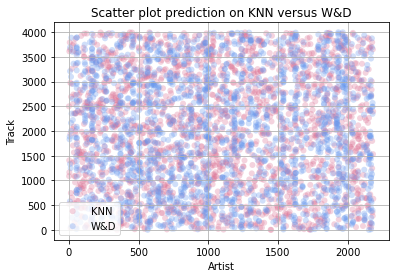

In [251]:
scatterplot_artist_track(comb_seed2)

In [241]:
def scatterplt(comb_seed):
    comb_seed3 = comb_seed
    comb_seed3['album_uri'] = comb_seed3['album_uri'].astype('category')
    comb_seed3['artist_uri'] = comb_seed3['artist_uri'].astype('category')
    comb_seed3['track_uri'] = comb_seed3['track_uri'].astype('category')
    comb_seed3['type'] = comb_seed3['type'].astype('category')
    comb_seed3['album_uri_enc'] = comb_seed3['album_uri'].cat.codes
    comb_seed3['artist_uri_enc'] = comb_seed3['artist_uri'].cat.codes
    comb_seed3['track_uri_enc'] = comb_seed3['track_uri'].cat.codes
    comb_seed3['type_enc'] = comb_seed3['type'].cat.codes
    comb_seed3 = comb_seed3.drop(['album_uri', 'artist_uri','track_uri','type'], axis=1)
    comb_seed3 = comb_seed3.drop(comb_seed3.columns[[0]], axis=1)
    pca = decomposition.PCA(n_components=2)
    pca.fit(comb_seed3)
    comb_pca = pca.transform(comb_seed3)
    np.amin(comb_pca)
    comb_pca_positive = comb_pca-np.amin(comb_pca)
    comb_pca_positive = comb_pca_positive[np.all(comb_pca_positive < 1000000, axis=1), :]
    
    fig, ax = plt.subplots()

    plt.scatter(comb_pca_positive[0:2000, 0], comb_pca_positive[0:2000, 1], c="palevioletred", label="KNN", alpha=0.3, edgecolors='none')
    plt.scatter(comb_pca_positive[2000:4000, 0],comb_pca_positive[2000:4000, 1], c="cornflowerblue", label="W&D", alpha=0.3, edgecolors='none')
    ax.legend()
    ax.grid(True)
    plt.title('Scatter plot prediction on KNN versus W&D')
    plt.xlabel('PCA component 1')
    plt.ylabel('PCA component 2')
    plt.show()

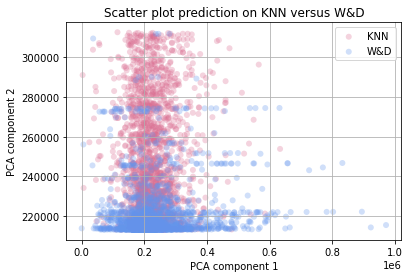

In [242]:
scatterplt(comb_seed2)

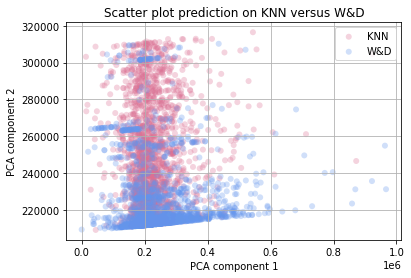

In [243]:
scatterplt(comb_seed3)